In [4]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Structure





In [5]:
supermart_data = pd.read_csv('/content/Train.csv')

In [8]:
supermart_data .head()
supermart_data .info()
supermart_data .describe()
supermart_data .isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [19]:
supermart_data ['Sales'].value_counts()

,count
Sales,
2266,13
1259,13
2045,13
527,12
540,12
...,...
709,1
2026,1
514,1


Convert Order Date to datetime

In [13]:
supermart_data['Order Date'] = pd.to_datetime(
    supermart_data['Order Date'],
    format='%m/%d/%Y',   # matches your "4/15/2018" format
    errors='coerce'      # invalid dates become NaT
)

Basic Descriptive Analysis

In [15]:
import numpy as np

# Total Sales & Profit
total_sales = supermart_data['Sales'].sum()
total_profit = supermart_data['Profit'].sum()
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

# Average Sales per order
avg_sales = np.mean(supermart_data['Sales'])
print("Average Sales per order:", avg_sales)

# Total Sales per Category
sales_per_category = supermart_data.groupby('Category')['Sales'].sum()
sales_per_category


Total Sales: 14956982
Total Profit: 3747121.1999999997
Average Sales per order: 1496.5961576946167


,Sales
Category,
Bakery,2112281
Beverages,2085313
"Eggs, Meat & Fish",2267401
Food Grains,2115272
Fruits & Veggies,2100727
Oil & Masala,2038442
Snacks,2237546


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


Visualization

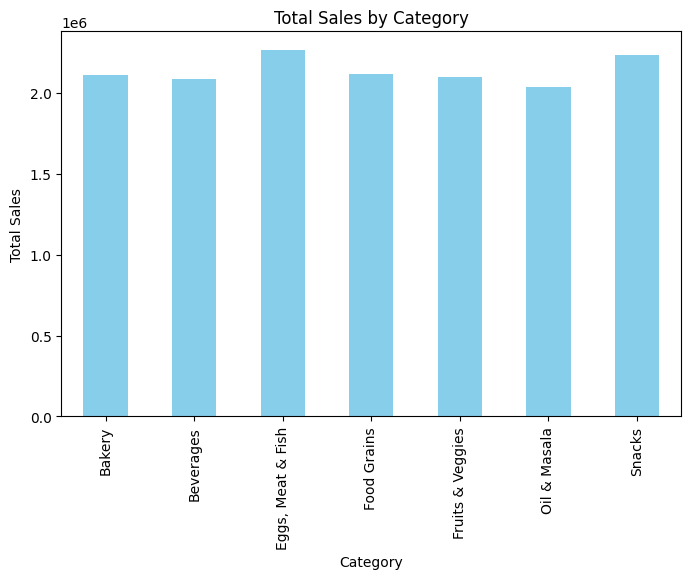

In [20]:
sales_per_category.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.show()

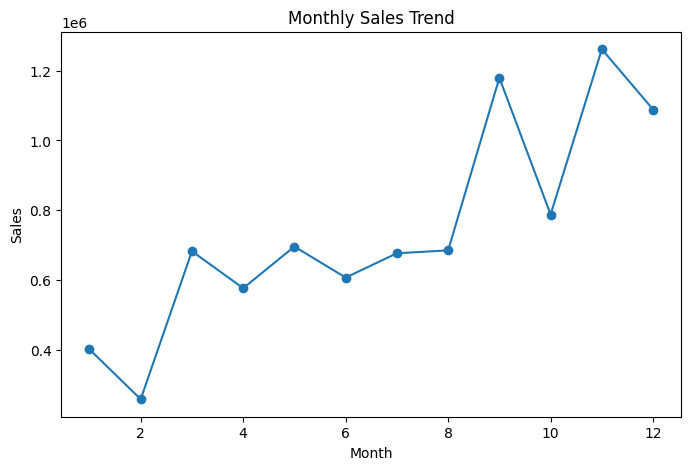

In [21]:
monthly_sales = supermart_data.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(8,5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

#to see trends and patterns overtime
#spot peaks and dips and key to for making smart decisions

Scatter plot

- scatter plot is a graph where each dot represents one data point.
- to see relationships between two variables

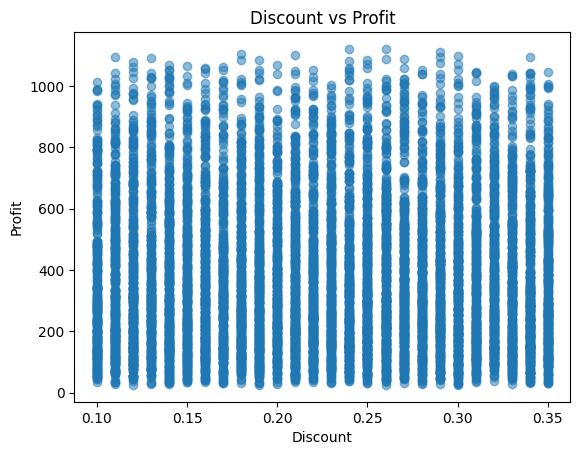

In [22]:
plt.scatter(supermart_data['Discount'], supermart_data['Profit'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']
le = LabelEncoder()
for col in categorical_cols:
    supermart_data[col] = le.fit_transform(supermart_data[col])


In [25]:
# Predicting Profit
X = supermart_data.drop(['Profit', 'Order ID', 'Customer Name', 'Order Date'], axis=1)
y = supermart_data['Profit']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 40366.89208812848
R2 Score: 0.3241738427720091


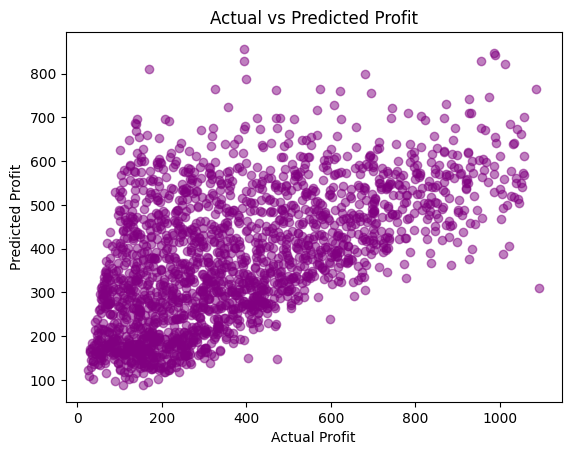

In [29]:
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()
